In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1100)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

498

In [4]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# define url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | semey
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | filingue
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | doka
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | canutama
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | verkhnevilyuysk
Processing Record 17 of Set 1 | san cristobal
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | kirakira
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | yulara
Processing Record 22 of Set 1 | ponta do sol
Processing 

Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | aasiaat
Processing Record 41 of Set 4 | mogadishu
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | aklavik
Processing Record 44 of Set 4 | kaminoyama
Processing Record 45 of Set 4 | talakan
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | bismarck
Processing Record 48 of Set 4 | marsa matruh
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | weyburn
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | tutoia
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | aflu
City not found. Skipping...
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | salaga
Processing Record 7 of Set 5 | nyurba
Processing Record 8 of Set 5 | nizhniy kuranakh
Processing Record 9 of Set 5 | matara
Processing Record 10 of Set 5 | liku
Processing Record 11 of Set 5 | bandarbeyla
Processing Record 12 of Set 5 

Processing Record 29 of Set 8 | havoysund
Processing Record 30 of Set 8 | nzega
Processing Record 31 of Set 8 | maceio
Processing Record 32 of Set 8 | berdigestyakh
Processing Record 33 of Set 8 | seddon
Processing Record 34 of Set 8 | chernyshevskiy
Processing Record 35 of Set 8 | luis correia
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | bollnas
Processing Record 38 of Set 8 | wad rawah
Processing Record 39 of Set 8 | iaciara
Processing Record 40 of Set 8 | witbank
Processing Record 41 of Set 8 | morwell
Processing Record 42 of Set 8 | leo
Processing Record 43 of Set 8 | halalo
City not found. Skipping...
Processing Record 44 of Set 8 | geraldton
Processing Record 45 of Set 8 | balkanabat
Processing Record 46 of Set 8 | richards bay
Processing Record 47 of Set 8 | zeya
Processing Record 48 of Set 8 | ijaki
City not found. Skipping...
Processing Record 49 of Set 8 | ostrovnoy
Processing Record 50 of Set 8 | formoso do araguaia
City not found. Skipping..

In [5]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# reorder columns
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp',
                    'Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Semey,KZ,2022-07-18 17:54:29,50.4111,80.2275,67.01,42,40,3.67
1,Filingue,NE,2022-07-18 17:54:30,14.3521,3.3168,87.17,55,63,13.73
2,Cabo San Lucas,MX,2022-07-18 17:49:47,22.8909,-109.9124,92.61,65,27,5.01
3,Doka,SD,2022-07-18 17:54:30,13.5167,35.7667,78.31,75,75,16.60
4,Kapaa,US,2022-07-18 17:51:37,22.0752,-159.3190,77.32,89,100,16.11
5,Hermanus,ZA,2022-07-18 17:54:31,-34.4187,19.2345,54.81,85,99,5.88
6,Barrow,US,2022-07-18 17:54:31,71.2906,-156.7887,39.83,83,99,13.85
7,Canutama,BR,2022-07-18 17:54:31,-6.5339,-64.3831,96.58,33,4,4.43
8,Qaanaaq,GL,2022-07-18 17:54:32,77.4840,-69.3632,44.31,58,54,2.62
9,Dikson,RU,2022-07-18 17:52:03,73.5069,80.5464,45.07,77,15,12.82


In [6]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

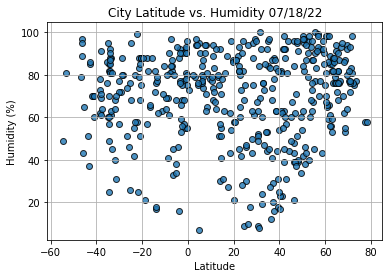

In [8]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

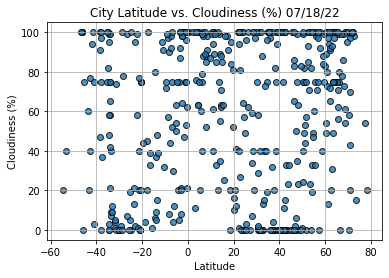

In [9]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

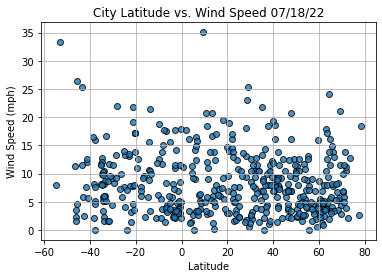

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [11]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title,
                           y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

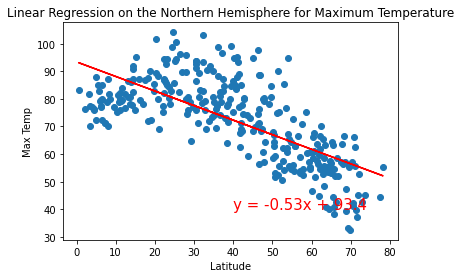

In [13]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(40,40))

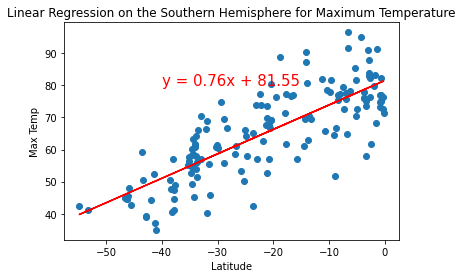

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-40,80))

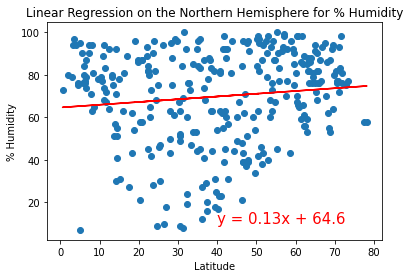

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,10))

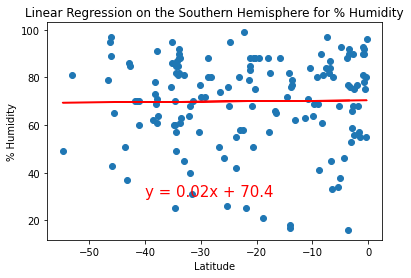

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',(-40,30))

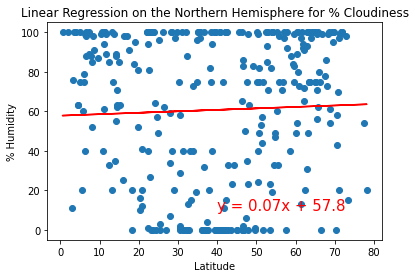

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Humidity',(40,10))

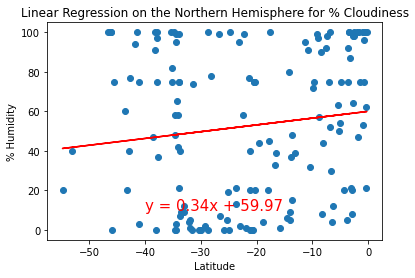

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Humidity',(-40,10))

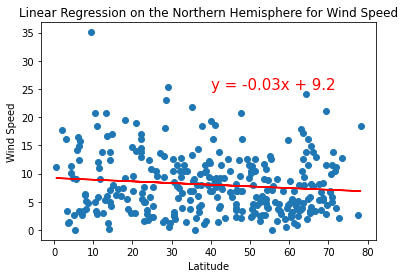

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed',(40,25))

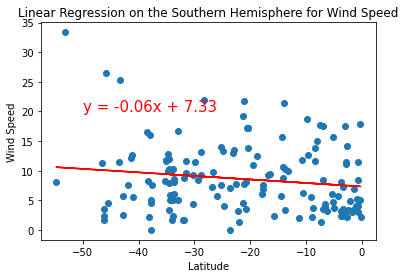

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed',(-50,20))